# Exercice 1 : Schéma de Euler
## Résolution analytique


Soit l'équation différentielle suivante : 


\begin{equation}
\frac{dy}{dt} + 100y = 100t + 101
\end{equation}

Nous cherchons la solution générale à l'équation :
$$\frac{dy}{dt} = -100y$$
$$\frac{dy}{y} = -100dt$$
$$ln(y) = -100t$$
$$y = Ae^{-100t}$$

Avec A une constante.\par
Pour résoudre cette équation, nous cherchons une fonction particulière de la forme : 

$$y_p = at + b$$
On a donc d'après (1) : 

\begin{equation}
a + 100(at+b) = 100t+101
\end{equation}

$$a + 100at + 100b = 100t + 101$$

On identifie alors les facteurs $a$ et $b$ par analogie : $a = 1$ et $b = 1$ :
$$ y_p = t+1$$

La solution de l'équation (1) est la somme entre la solution générale et la solution particulière : 
$$y = Ae^{-100t} + 100t +1$$

Determinons la constante A : 

$$y(0) = A + 1$$

Nous avons donc $A = y(0) -1$\par
$$y(t) = (y(0)-1)e^{-100t} + t + 1$$

Bien qu'ici nous ayons une solution analytique pour l'équation différentielle, nous allons ici étudier le système à l'aide d'un schéma de Euler afin  de pouvoir comparer les solutions numériques et analytiques: 

## Le schéma : 

La méthode d'Euler est une méthode permettant de calculer numériquement la solution d'une équation différentielle. La méthode d'Euler consiste à définir une suite $U_i$ qui va prendre les différentes valeurs de $y(t)$. Chaque terme de la suite est calculé à l'aide du précédent ainsi que de la dérivé de la fonction $y$ ($\frac{dy}{dt}$) en ce point. 

\begin{equation}
U_{i+1} = U_i + \frac{y_{i+1}-y_i}{t_{i+1}-t_i}*(t_{i+1}-t_i)
\end{equation}
Pour $\Delta t$ suffisament petit on à : 
$$U_{i+1} = U_i + \frac{dy}{dt}dt$$

Il ne manque plus qu'a définir les conditions initiales du système $U_0$ ; ce qui correspond au nombre d'animaux au départ. 

Le code suivant simule le système avec y(0) = 5. Le système est étudié sur l'interval [0;2]. Grâce au schéma d'Euler, 2000 points on été générés sur l'interval [0;2] on a donc un $\Delta t = 0.1$.



In [ ]:
####Importation des librairies
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import exp

In [ ]:
#Définition des temps
n = 2000
t0 = 0
tn = 2
#Condition initiale
y0 = 5

In [ ]:
#Equation différentielle
def f(y,t):
    dy = -100*y + 100*t + 101
    return dy

#Solution Analytique
def y(t):
    y = (y0-1)*exp(-100*t) + t + 1
    return y

Ici nous définissons premièrement $f(t,y)$ qui représente notre système dynamique. Ainsi que $y(t)$ qui est la solution analytique. Cela nous permettra de comparer les deux solutions obtenue.

In [ ]:
#Définition d'une échelle de temps
t = [t0]
for i in range(n):
    t.append(t0 + i*(tn-t0)/n)

#Résolution selon la méthode de Euler : 
#Func : Système dynamique 
#y0 : Condition initiale
#t : list de temps

def euler(func,y0,t): 
    u = [y0]
    n = len(t)
    for i in range(n-1):
        u1 = u[i] + ((t[i+1]-t[i])* func(u[i],t[i]))
        u.append(u1)
    return u
     
#Résolution Exacte :
a = [y0]
for i in range (n):
    a.append(y(t[i]))
    

b = euler(f,y0,t)
c = odeint(f,y0,t)

Nous avons ainsi calculer l'évolution du système via trois méthodes : 
A : Solution Analytique
B : Schéma de Euler
C : OdeInt (Scipy)

Nous pouvons alors afficher graphiquement :

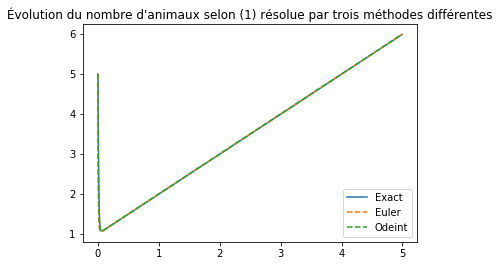

In [24]:
#Graphique
plt.plot(t,a)
plt.plot(t,b,'--')
plt.plot(t,c,'--')
plt.legend(["Exact","Euler","Odeint"])
plt.title("Évolution du nombre d'animaux selon (1) résolue par trois méthodes différentes")
plt.show()

Ci-dessous la fonction error nous permet de quantifier l'erreur faite entre la solution numérique et la solution analytique. 

In [ ]:
def error(a,b):
    r = 0
    for i in range(len(a)-1):
        r = r + (a[i]-b[i])**2
    return r

print("Différence entre la courbe analytique et le schéma d'Euler : ",error(a,b))
print("Différence entre la courbe analytique et odeint : ",error(a,c)[0])


# Exercice 2

In [ ]:
import pylab

def champv(function, xm, xM, stx, ym, yM, sty, args=[]):
    x_range = np.arange(xm, xM, stx)
    y_range = np.arange(ym, yM, sty)
    x, y = np.meshgrid(x_range, y_range, sparse=True)
    if args == []:
        dx = function([x, y], 0)
    else:
        dx = function([x, y], 0, args)
    pylab.close("all")
    pylab.quiver(x, y, dx[0], dx[1])
    

def geneswitch(x,t):
    d=1
    a=4
    b=1
    p=4
    dx = [0,0]
    dx[0] = a/(b**p+x[1]**p)-d*x[0]
    dx[1] = a/(b**p+x[0]**p)-d*x[1]
    return dx

t = np.arange(0., 10., 0.01)
N = odeint(geneswitch, [4.,1.], t)
pylab.close("all")
pylab.plot(t,N[:,0])
pylab.plot(t,N[:,1],"--")
pylab.show()

In [ ]:
pylab.close("all")
champv(geneswitch,0,4,0.3,0,4,0.3)
N = odeint(geneswitch, [4.,4.], np.arange(0., 100., 0.01))
pylab.plot(N[:,0], N[:,1])
pylab.show()

# Exercice 3

Analyse des états d'équilibres du système : 

$\frac{dx_0}{dt} = \frac{a}{b+x_1} - k_1x_0x_1$

$\frac{dx_1}{dt} = \frac{a}{b+x_0} - k_1x_0x_1$

In [ ]:
def dimère(x,t):
    a = 3
    b = 1
    k = 1
    dx = [0,0]
    dx[0] = a/(b+x[1]) - (k * x[0] * x[1])
    dx[1] = a/(b+x[0]) - (k * x[0] * x[1])
    return(dx)

t = np.linspace(0,5,100000)
y = odeint(dimère,[0.1,0.1],t)

pylab.plot(t,y)
pylab.show()

In [ ]:
def feedback(x,t):
    d = 1
    a = 3
    b = 1
    dx = 0
    dx = a/(b+x) - d*x
    return(dx)

t = [t0]
n = 1000
tn = 5
for i in range(n):
    t.append(t0 + i*(tn-t0)/n)    

y = euler(feedback,0,t)
yy = odeint(feedback,0,t)

pylab.plot(t,y,'--')
pylab.plot(t,yy)
pylab.show()